# CRIME RATE vs HOUSE PRICE analysis

#### Hypotheses 3 : Crime rate will affect the house price negatively. The higher the crime rate in the suburb, the less likely the house price will increase

### Observation : based on all the plotting, it shows that there is a negative correlation between the two factors
### Conclusion : This concluded that the hypotheses is correct

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time, json, os, csv
import datetime
import random
import scipy.stats as st

from scipy.stats import linregress
from citipy import citipy
from pprint import pprint

# Hi Markers, please use your onw API keys to run the script, thank you!
from api_keys import weather_api_key
from api_keys import g_key

In [2]:
#import crime data into pandas from CSV
crime_data = "data_source/cleaned_source_data/crime_cleaned.csv"
crime_df = pd.read_csv(crime_data)

#import HOUSE PRICES data into pandas from CSV
housing_data = "data_source/cleaned_source_data/house_cleaned.csv"
housing_df = pd.read_csv(housing_data)

# DATA CLEANING


In [3]:
crime_df.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
0,2018,March,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,1
1,2018,March,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,1
2,2018,March,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1
3,2018,March,Alpine,3691,Dederang,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1
4,2018,March,Alpine,3691,Glen Creek,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,2


In [4]:
crime_df.shape

(99486, 9)

In [5]:
crime_count = crime_df.groupby(["Suburb/Town Name","Year"]).max()
unwanted = ["Offence Division","Offence Subdivision","Offence Subgroup","Year ending"]
crime_count = crime_count.drop(columns= unwanted)
crime_count = crime_count.drop(["Local Government Area","Postcode"],axis=1)
crime_count

Incidents Recorded
Suburb/Town Name Year                    
Abbeyard         2017                   1
Abbotsford       2016                 183
                 2017                 207
                 2018                 143
Aberfeldie       2016                  53
...                                   ...
Yuulong          2016                   1
Zeerust          2016                   8
                 2017                  15
                 2018                   4
Zumsteins        2018                   1

[6851 rows x 1 columns]

In [6]:
#change the dataframe index to column using reset_index 
clean_crime_df = crime_count.reset_index(level=None, drop=False, inplace =False)
clean_crime_df = clean_crime_df.rename(columns={"Suburb/Town Name":"Suburb"})
clean_crime_df.head()

,Suburb,Year,Incidents Recorded
0,Abbeyard,2017,1
1,Abbotsford,2016,183
2,Abbotsford,2017,207
3,Abbotsford,2018,143
4,Aberfeldie,2016,53


In [7]:
housing_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,"1,480,000",S,Biggin,3/12/2016,2.5,3067,1,1,202,0,0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000",S,Biggin,4/02/2016,2.5,3067,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,"1,465,000",SP,Biggin,4/03/2017,2.5,3067,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,"850,000",PI,Biggin,4/03/2017,2.5,3067,2,1,94,0,0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,"1,600,000",VB,Nelson,4/06/2016,2.5,3067,1,2,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019


In [8]:
#add in 1 columns to show the sold year because we only need to know the year
housing_df["Year"] = pd.DatetimeIndex(housing_df["Date"]).year
housing_df["Price"] = housing_df["Price"].str.replace(',','')
housing_df["Price"] = housing_df["Price"].astype("float")
# housing_df["Month Sold"] = pd.DatetimeIndex(housing_df["Date"]).month

In [9]:
#only select relavant columns
unwanted = ["Postcode","Method","SellerG","Date","Distance","Lattitude","Longtitude","Propertycount","Address","Rooms","Bathroom","Car","YearBuilt"]
housing_df2 = housing_df.drop(columns = unwanted, axis = 1)

##### MERGING DATAFRAME to get final dataset

In [10]:
#merging both crime rate and housing data set
merge_df = pd.merge(clean_crime_df,housing_df2, on = ("Suburb","Year"))
merge_df.head()

,Suburb,Year,Incidents Recorded,Type,Price,Landsize,BuildingArea,CouncilArea,Regionname
0,Abbotsford,2016,183,h,1480000.0,202,0,Yarra City Council,Northern Metropolitan
1,Abbotsford,2016,183,h,1035000.0,156,79,Yarra City Council,Northern Metropolitan
2,Abbotsford,2016,183,h,1600000.0,120,142,Yarra City Council,Northern Metropolitan
3,Abbotsford,2016,183,h,941000.0,181,0,Yarra City Council,Northern Metropolitan
4,Abbotsford,2016,183,h,1876000.0,245,210,Yarra City Council,Northern Metropolitan


In [11]:
#quick summary to see average price across the year based on each postcode
merge_df2 = merge_df.groupby(["Suburb","Year"]).agg(["mean"])
merge_df2["Price"]=round(merge_df2["Price"])
merge_df2

Incidents Recorded      Price    Landsize BuildingArea
                              mean       mean        mean         mean
Suburb     Year                                                       
Abbotsford 2016                183   979102.0   85.954545    53.318182
           2017                207  1074913.0  260.384615    42.211538
           2018                143  1074333.0  100.666667    35.833333
Aberfeldie 2016                 53  1258273.0  457.500000    86.181818
           2017                 41  1314547.0  403.023256    74.674419
...                            ...        ...         ...          ...
Yallambie  2018                 24   742400.0  258.800000    26.200000
Yarra Glen 2017                 15   620000.0  863.000000   180.000000
Yarraville 2016                172   926041.0  283.738636    70.943182
           2017                173  1028087.0  250.932836    63.626866
           2018                168  1019857.0  264.892857    49.714286

[781 rows x 4 columns]

In [12]:
#create a new dataframe by reset the index from the groupby table above
#select multiple columns
new_df = merge_df2.reset_index(inplace =False)
new_df = new_df.iloc[:,[0,1,2,3]]

# new_df = new_df.rename(columns={"Incidents Recorded":"Crime Case"}, level=1, inplace=True)
new_df.columns = ['_'.join(col) for col in new_df.columns.values]
new_df = new_df.rename(columns = {"Suburb_":"Suburb", "Year_":"Year","Incidents Recorded_mean": "Incidents Recorded","Price_mean":"Price"})

new_df

,Suburb,Year,Incidents Recorded,Price
0,Abbotsford,2016,183,979102.0
1,Abbotsford,2017,207,1074913.0
2,Abbotsford,2018,143,1074333.0
3,Aberfeldie,2016,53,1258273.0
4,Aberfeldie,2017,41,1314547.0
...,...,...,...,...
776,Yallambie,2018,24,742400.0
777,Yarra Glen,2017,15,620000.0
778,Yarraville,2016,172,926041.0
779,Yarraville,2017,173,1028087.0


In [13]:
#THIS IS JUST TO MAKE THE HOUSE PRICE READABLE 
new_df["Price"]=new_df["Price"]/1000
new_df

,Suburb,Year,Incidents Recorded,Price
0,Abbotsford,2016,183,979.102
1,Abbotsford,2017,207,1074.913
2,Abbotsford,2018,143,1074.333
3,Aberfeldie,2016,53,1258.273
4,Aberfeldie,2017,41,1314.547
...,...,...,...,...
776,Yallambie,2018,24,742.400
777,Yarra Glen,2017,15,620.000
778,Yarraville,2016,172,926.041
779,Yarraville,2017,173,1028.087


### Display cleaned data in Scatter Plot ###

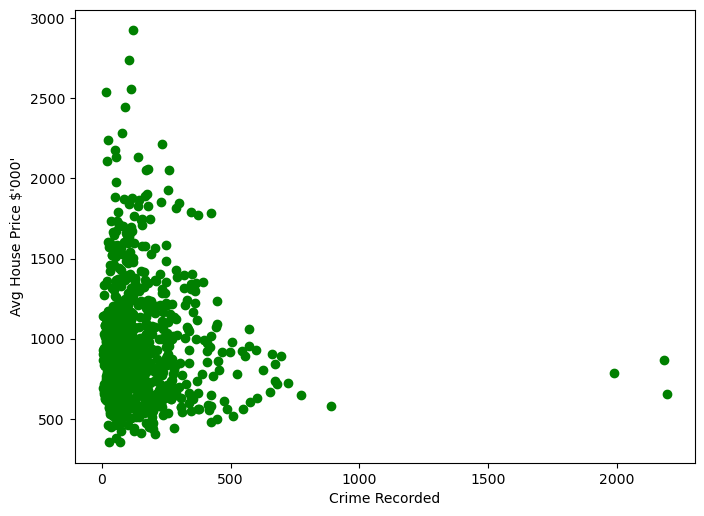

In [14]:
######################################################################
######## Plot scatter with the data that we have from 2016-2018#######
######################################################################

#using NEW DF DATA, HOUSE PRICE change in '000' unit
fig = plt.figure(figsize=(8,6), dpi=100)
plt.scatter(new_df["Incidents Recorded"], new_df["Price"], facecolors = "green", marker="o")
plt.xlabel("Crime Recorded")
plt.ylabel("Avg House Price $'000'")
plt.savefig("Output/CrimeRatevsHousePrice_correlation.png",bbox_inches='tight')
plt.show()
#can't see that there's any direct correlationship. 


## Scatter Plot of Crime Rate vs House Price by each year

In [15]:
#select only 2016 data
select_2016 = new_df.loc[new_df["Year"]==2016,:]

The correlation between both factors based on 2016 data is -0.11


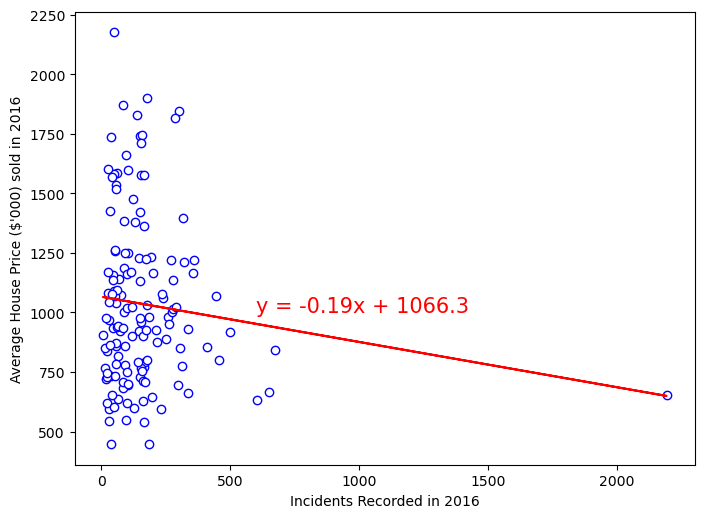

In [16]:
#Create scatter plot with 2016 data, to see the correlation between crime rate and house price
#Adding linear regression equation and line to plot
fig = plt.figure(figsize=(8,6), dpi=100)
x_values = select_2016["Incidents Recorded"]
y_values = select_2016["Price"]
correlation=st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2))+ "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolors = "white", edgecolors = "blue", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (600,1000), fontsize = 15, color="red")
plt.xlabel("Incidents Recorded in 2016")
plt.ylabel("Average House Price ($'000) sold in 2016")
print(f"The correlation between both factors based on 2016 data is {round(correlation[0],2)}")
plt.savefig("Output/2016_linearregression.png")
plt.show()

In [17]:
#select only 2017 data
select_2017 = new_df.loc[new_df["Year"]==2017,:]

The correlation between both factors based on 2017 data is -0.04


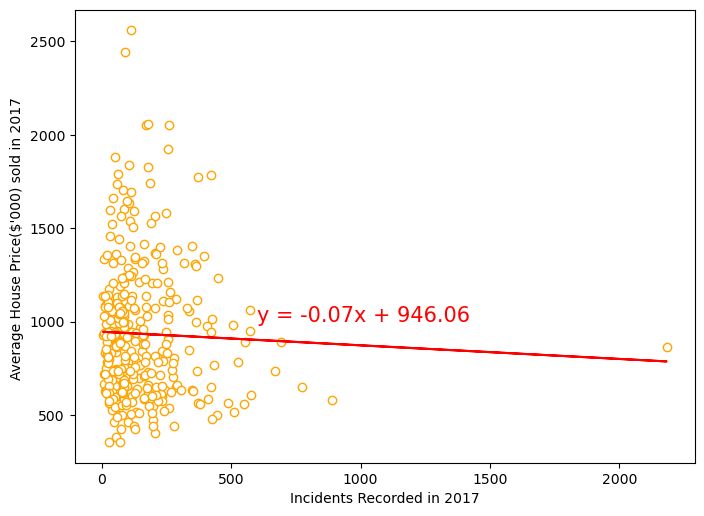

In [18]:
#Adding linear regression equation and line to plot
fig = plt.figure(figsize=(8,6), dpi=100)
x_values = select_2017["Incidents Recorded"]
y_values = select_2017["Price"]
correlation=st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2))+ "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolors = "white", edgecolors = "orange", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (600,1000), fontsize = 15, color="red")
print(f"The correlation between both factors based on 2017 data is {round(correlation[0],2)}")
plt.xlabel("Incidents Recorded in 2017")
plt.ylabel("Average House Price($'000) sold in 2017 ")
plt.savefig("Output/2017_linearregression.png")
plt.show()

In [19]:
#select only 2018 data
select_2018 = new_df.loc[new_df["Year"]==2018,:]

The correlation between both factors based on 2018 data is -0.07


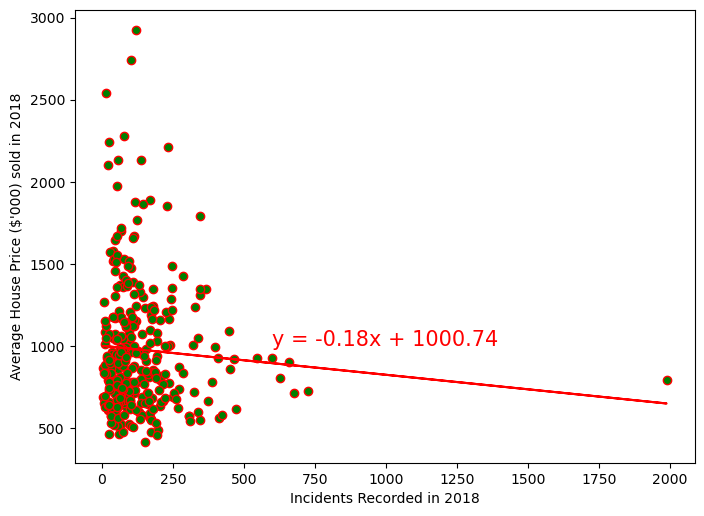

In [20]:
#Adding linear regression equation and line to plot
fig = plt.figure(figsize=(8,6), dpi=100)
x_values = select_2018["Incidents Recorded"]
y_values = select_2018["Price"]
correlation=st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2))+ "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolors = "green", edgecolors = "red", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (600,1000), fontsize = 15, color="red")
print(f"The correlation between both factors based on 2018 data is {round(correlation[0],2)}")
plt.xlabel("Incidents Recorded in 2018")
plt.ylabel("Average House Price ($'000) sold in 2018")
plt.savefig("Output/2018_linearregression.png")
plt.show()

## Find the top expensive suburbs from 2016-2018

In [21]:
#top 10 expensive suburbs in 2016
top_price_2016 = new_df.loc[new_df["Year"]==2016,:]
top_price_2016 = top_price_2016.sort_values("Price", ascending=False)
top_price_2016.head(10)

,Suburb,Year,Incidents Recorded,Price
148,Canterbury,2016,49,2175.882
464,Malvern,2016,176,1899.959
54,Balwyn,2016,84,1870.603
100,Brighton,2016,300,1847.455
10,Albert Park,2016,140,1827.686
424,Kew,2016,287,1815.328
142,Camberwell,2016,157,1746.988
57,Balwyn North,2016,151,1739.850
399,Ivanhoe East,2016,37,1735.167
704,Toorak,2016,154,1711.424


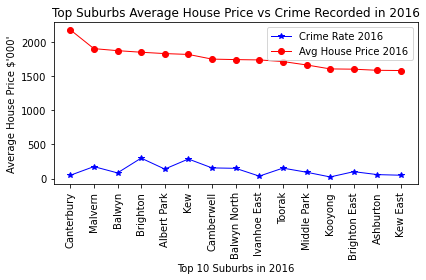

In [22]:
#plotting the top house price suburbs in 2016 against their crime rate
#see if there's any correlation between the house price & crime rate
fig= plt.figure(figsize=(6,4))
x_axis_2016 = top_price_2016["Suburb"].head(15)
crimecase_2016 = top_price_2016["Incidents Recorded"].head(15)
avgprice_2016 = top_price_2016["Price"].head(15)

crime_case_2016, = plt.plot(x_axis_2016, crimecase_2016,marker = "*", color="blue", linewidth=1, label = "Crime Rate 2016")
avg_house_2016, = plt.plot(x_axis_2016,avgprice_2016,marker = "o", color="red", linewidth=1, label = "Avg House Price 2016")
plt.legend(handles=[crime_case_2016, avg_house_2016], loc="best")
plt.xticks(x_axis_2016, rotation=90, fontsize= 10)
plt.title("Top Suburbs Average House Price vs Crime Recorded in 2016")
plt.xlabel("Top 10 Suburbs in 2016")
plt.ylabel("Average House Price $'000'")
plt.tight_layout()
plt.savefig("Output/top2016vsCrime.png")
plt.show()

In [23]:
#top 10 expensive suburbs in 2017
top_price_2017 = new_df.loc[new_df["Year"]==2017,:]
top_price_2017 = top_price_2017.sort_values("Price", ascending=False)
top_price_2017.head(10)

,Suburb,Year,Incidents Recorded,Price
149,Canterbury,2017,111,2559.809
493,Middle Park,2017,91,2442.815
465,Malvern,2017,177,2057.911
101,Brighton,2017,260,2054.073
11,Albert Park,2017,170,2053.028
143,Camberwell,2017,255,1925.546
400,Ivanhoe East,2017,51,1882.150
55,Balwyn,2017,104,1841.157
58,Balwyn North,2017,178,1827.007
266,Eaglemont,2017,61,1789.368


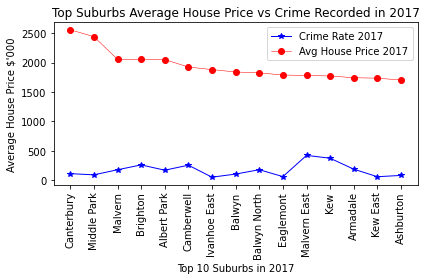

In [24]:
#plotting the top house price suburbs in 2016 against their crime rate
#see if there's any correlation between the house price & crime rate
fig= plt.figure(figsize=(6, 4))
x_axis_2017 = top_price_2017["Suburb"].head(15)
crimecase_2017 = top_price_2017["Incidents Recorded"].head(15)
avgprice_2017 = top_price_2017["Price"].head(15)
crime_case_2017, = plt.plot(x_axis_2017, crimecase_2017,marker = "*", color="blue", linewidth=1, label = "Crime Rate 2017")
avg_house_2017, = plt.plot(x_axis_2017,avgprice_2017 ,marker = "o", color="red", linewidth=0.5, label = "Avg House Price 2017")
plt.legend(handles=[crime_case_2017, avg_house_2017], loc="best")
plt.title("Top Suburbs Average House Price vs Crime Recorded in 2017")
plt.xlabel("Top 10 Suburbs in 2017")
plt.ylabel("Average House Price $'000")
plt.xticks(x_axis_2017, rotation=90, fontsize=10)
plt.tight_layout()
plt.savefig("Output/top2017vsCrime.png")
plt.show()

In [25]:
#top 10 expensive suburbs in 2018
top_price_2018 = new_df.loc[new_df["Year"]==2018,:]
top_price_2018 = top_price_2018.sort_values("Price", ascending=False)
top_price_2018.head(10)

,Suburb,Year,Incidents Recorded,Price
466,Malvern,2018,121,2922.923
494,Middle Park,2018,104,2740.889
239,Deepdene,2018,14,2540.833
56,Balwyn,2018,77,2279.600
731,Warrandyte,2018,24,2240.500
102,Brighton,2018,232,2213.556
94,Box Hill,2018,139,2135.578
150,Canterbury,2018,56,2135.500
446,Kooyong,2018,20,2105.000
37,Ashburton,2018,53,1975.083


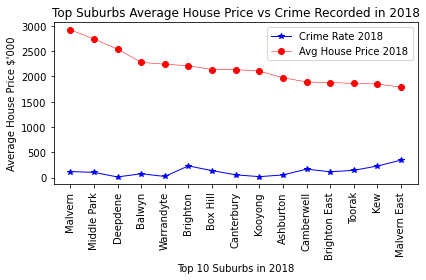

In [26]:
#plotting the top house price suburbs in 2016 against their crime rate
#see if there's any correlation between the house price & crime rate
fig= plt.figure(figsize=(6,4))
x_axis_2018 = top_price_2018["Suburb"].head(15)
crimecase_2018 = top_price_2018["Incidents Recorded"].head(15)
avgprice_2018 = top_price_2018["Price"].head(15)
crime_case_2018, = plt.plot(x_axis_2018, crimecase_2018,marker = "*", color="blue", linewidth=1, label = "Crime Rate 2018")
avg_house_2018, = plt.plot(x_axis_2018,avgprice_2018 ,marker = "o", color="red", linewidth=0.5, label = "Avg House Price 2018")
plt.legend(handles=[crime_case_2018, avg_house_2018], loc="best")
plt.title("Top Suburbs Average House Price vs Crime Recorded in 2018")
plt.xlabel("Top 10 Suburbs in 2018")
plt.ylabel("Average House Price $'000")
plt.xticks(x_axis_2018, rotation=90, fontsize=10)
plt.tight_layout()
plt.savefig("Output/top2018vsCrime.png")
plt.show()

In [27]:
combine_data = pd.merge(x_axis_2016, x_axis_2017)  
combine_data2 = pd.merge(combine_data, x_axis_2018)
combine_data2

#THIS IS THE TOP EXPENSIVE SUBURBS throughout the 3 years period

,Suburb
0,Canterbury
1,Malvern
2,Balwyn
3,Brighton
4,Kew
5,Camberwell
6,Middle Park
7,Ashburton


In [28]:
final_df = pd.merge(combine_data2, new_df)
final_df

#this display the average house price of top expensive suburbs from 2016-2018

,Suburb,Year,Incidents Recorded,Price
0,Canterbury,2016,49,2175.882
1,Canterbury,2017,111,2559.809
2,Canterbury,2018,56,2135.500
3,Malvern,2016,176,1899.959
4,Malvern,2017,177,2057.911
5,Malvern,2018,121,2922.923
6,Balwyn,2016,84,1870.603
7,Balwyn,2017,104,1841.157
8,Balwyn,2018,77,2279.600
9,Brighton,2016,300,1847.455


# CRIME RATE vs HOUSE PRICE in TOP EXPENSIVE SUBURBS


### Find out the crime rate trend in the TOP EXPENSIVE Suburbs 2016-2018

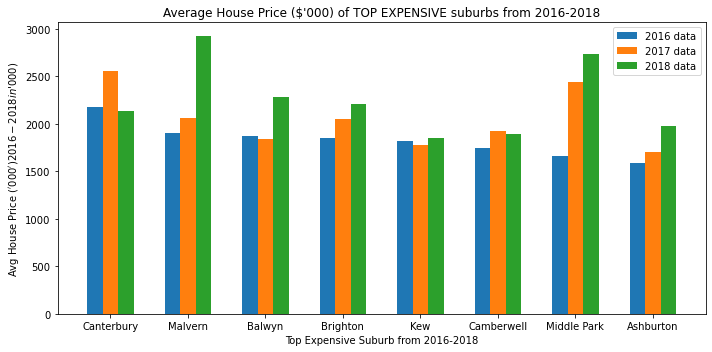

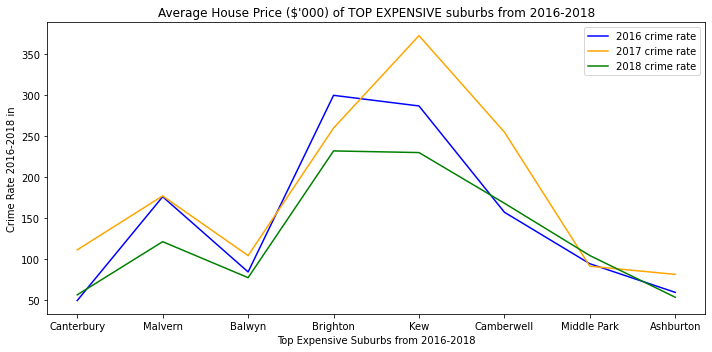

In [29]:
fig, ax = plt.subplots(figsize=(10,5))

#top suburbs list
x=final_df["Suburb"].unique()

y_2016 = final_df.loc[final_df["Year"]==2016, "Price"]
z_2016 = final_df.loc[final_df["Year"]==2016, "Incidents Recorded"]

y_2017 = final_df.loc[final_df["Year"]==2017, "Price"]
z_2017 = final_df.loc[final_df["Year"]==2017, "Incidents Recorded"]

y_2018 = final_df.loc[final_df["Year"]==2018, "Price"]
z_2018 = final_df.loc[final_df["Year"]==2018, "Incidents Recorded"]

x_range = np.arange(len(x))
bar1 = plt.bar(x_range -0.2, y_2016, 0.2, label="2016 data")
bar2 = plt.bar(x_range +0.0, y_2017, 0.2, label="2017 data")
bar3 = plt.bar(x_range +0.2, y_2018, 0.2, label="2018 data")

plt.xticks(x_range,x)

plt.xlabel("Top Expensive Suburb from 2016-2018")
plt.ylabel("Avg House Price ($'000') 2016-2018 in $'000)")
plt.title("Average House Price ($'000) of TOP EXPENSIVE suburbs from 2016-2018")
plt.legend(loc="best", fontsize=10)



# linechart = plt.plot(final_df["Incidents Recorded"],color = "blue")
plt.tight_layout()

plt.savefig("Output/bar_topsuburbs.png")
plt.show()




fig, ax = plt.subplots(figsize=(10,5))
#######
x=final_df["Suburb"].unique()

y_2016 = final_df.loc[final_df["Year"]==2016, "Incidents Recorded"]

y_2017 = final_df.loc[final_df["Year"]==2017, "Incidents Recorded"]

y_2018 = final_df.loc[final_df["Year"]==2018, "Incidents Recorded"]

x_range = np.arange(len(x))
line1 = plt.plot(x_range, y_2016, color= "blue", label="2016 crime rate")
line2 = plt.plot(x_range, y_2017, color= "orange", label="2017 crime rate")
line3 = plt.plot(x_range, y_2018, color= "green", label="2018 crime rate")
plt.xticks(x_range,x)

plt.xlabel("Top Expensive Suburbs from 2016-2018")
plt.ylabel("Crime Rate 2016-2018 in")
plt.title("Average House Price ($'000) of TOP EXPENSIVE suburbs from 2016-2018")
plt.legend(loc="best")



# linechart = plt.plot(final_df["Incidents Recorded"],color = "blue")
plt.tight_layout()
plt.savefig("Output/line_crimerate.png")
plt.show()



# correlation analysis for Top Expensive Suburbs

The correlation between both factors is -0.07


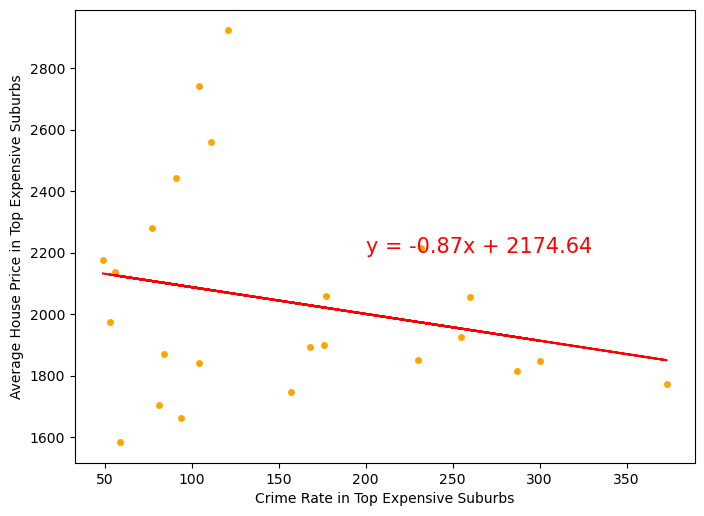

In [30]:
#Adding linear regression equation and line to plot
fig = plt.figure(figsize=(8,6), dpi=100)
x_values = final_df["Incidents Recorded"]
y_values = final_df["Price"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2))+ "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolors = "orange", edgecolors = "white", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (200,2200), fontsize = 15, color="red")
plt.xlabel("Crime Rate in Top Expensive Suburbs")
plt.ylabel("Average House Price in Top Expensive Suburbs")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("Output/crimerate_houseprice_correlation.png")
plt.show()

# CRIME RATE vs HOUSE PRICE in TOP CRIME SUBURB

In [31]:
#bottom 10 CRIME of suburbs in 2016
#TOP 10 CRIME of suburbs in 2016

mcrime2016 = select_2016.sort_values("Incidents Recorded",ascending = True)
min_crime2016 = mcrime2016.head(10)
crime2016 = select_2016.sort_values("Incidents Recorded",ascending = False)
max_crime2016 = crime2016.head(50)

df_2016_crime =crime2016["Incidents Recorded"].head(50)
df_2016_price = crime2016["Price"].head(50)
# df_2016_price 
# df_2016_crime.tolist()

In [32]:
#select just 2017

select_2017 = new_df.loc[new_df["Year"]==2017,:]
#bottom 10 CRIME of suburbs in 2017
#THIS IS NOT REQUIRED
mcrime2017 = select_2017.sort_values("Incidents Recorded",ascending = True)
min_crime2017 =mcrime2017.head(10)

#TOP 10 CRIME of suburbs in 2017
crime2017 = select_2017.sort_values("Incidents Recorded",ascending = False)
max_crime2017 = crime2017.head(50)
df_2017_crime =crime2017["Incidents Recorded"].head(50)
df_2017_price = crime2017["Price"].head(50)


In [33]:
#select just 2018
select_2018 = new_df.loc[new_df["Year"]==2018,:]

#TOP 10 CRIME of suburbs in 2018
#THIS IS NOT REQUIRED
crime2018 = select_2018.sort_values("Incidents Recorded",ascending = False)
max_crime2018 = crime2018.head(10)

#bottom 10 CRIME of suburbs in 2018
#THIS IS NOT REQUIRED
mcrime2018 = select_2018.sort_values("Incidents Recorded",ascending = True)
min_crime2018 = mcrime2018.head(10)

df_2018_crime =crime2018["Incidents Recorded"].head(50)
df_2018_price = crime2018["Price"].head(50)


The correlation coefficient between both factors in 2016 is -0.18
The correlation coefficient between both factors in 2017 is -0.09
The correlation coefficient between both factors in 2018 is -0.2


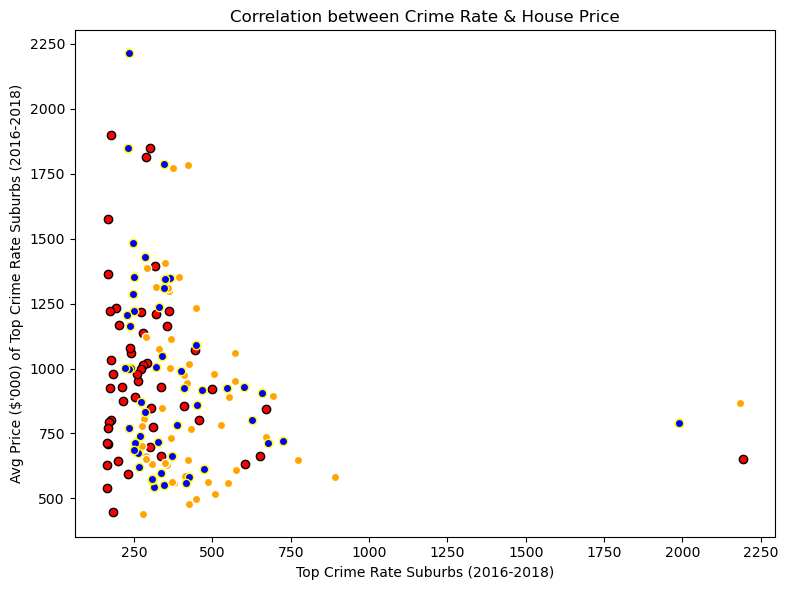

In [34]:

fig = plt.figure(figsize=(8,6), dpi=100)

plt.scatter(df_2016_crime,df_2016_price, marker = "o", facecolors = "red", edgecolors = "black")
correlation=st.pearsonr(df_2016_crime,df_2016_price)
print(f"The correlation coefficient between both factors in 2016 is {round(correlation[0],2)}")

plt.scatter(df_2017_crime,df_2017_price, marker = "o", facecolors = "orange", edgecolors = "white")
correlation=st.pearsonr(df_2017_crime,df_2017_price)
print(f"The correlation coefficient between both factors in 2017 is {round(correlation[0],2)}")

plt.scatter(df_2018_crime,df_2018_price, marker = "o", facecolors = "blue", edgecolors = "yellow")
correlation=st.pearsonr(df_2018_crime,df_2018_price)
print(f"The correlation coefficient between both factors in 2018 is {round(correlation[0],2)}")

plt.xlabel("Top Crime Rate Suburbs (2016-2018)")
plt.ylabel("Avg Price ($'000) of Top Crime Rate Suburbs (2016-2018)")
plt.title ("Correlation between Crime Rate & House Price")

fig.tight_layout()
plt.savefig("Output/CorrelationCrime&HousePrice.png")
plt.show()

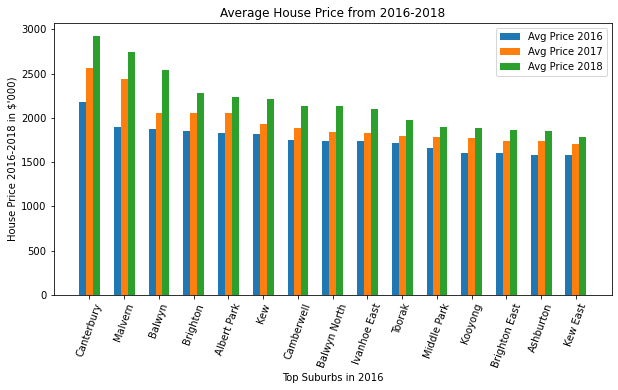

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
#2016 top suburbs list
x= x_axis_2016.tolist()

y_2016 = avgprice_2016
z_2016 = crimecase_2016

y_2017 = avgprice_2017
z_2017 = crimecase_2017

y_2018 = avgprice_2018
z_2018 = crimecase_2018

x_range = np.arange(len(x_axis_2016))
bar1 = plt.bar(x_range -0.2, y_2016, 0.2, label="Avg Price 2016")
bar2 = plt.bar(x_range +0.0, y_2017, 0.2, label="Avg Price 2017")
bar3 = plt.bar(x_range +0.2, y_2018, 0.2, label="Avg Price 2018")

plt.xticks(x_range,x,rotation=70)
plt.xlabel("Top Suburbs in 2016")
plt.ylabel("House Price 2016-2018 in $'000)")
plt.title("Average House Price from 2016-2018")
plt.legend()
plt.savefig("Output/TOP2016_housepricetrend.png")


# linechart = plt.plot(final_df["Incidents Recorded"],color = "blue")

plt.show()





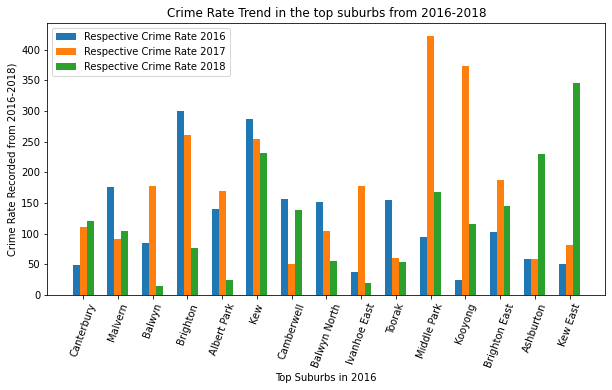

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
#2016 top suburbs list
x= x_axis_2016.tolist()

y_2016 = avgprice_2016
z_2016 = crimecase_2016

y_2017 = avgprice_2017
z_2017 = crimecase_2017

y_2018 = avgprice_2018
z_2018 = crimecase_2018

x_range = np.arange(len(x_axis_2016))
bar1 = plt.bar(x_range -0.2, z_2016, 0.2, label="Respective Crime Rate 2016")
bar2 = plt.bar(x_range +0.0, z_2017, 0.2, label="Respective Crime Rate 2017")
bar3 = plt.bar(x_range +0.2, z_2018, 0.2, label="Respective Crime Rate 2018")

plt.xticks(x_range,x,rotation=70)
plt.xlabel("Top Suburbs in 2016")
plt.ylabel("Crime Rate Recorded from 2016-2018)")
plt.title("Crime Rate Trend in the top suburbs from 2016-2018")
plt.legend()
plt.savefig("Output/TOP2016_crimeratetrend.png")


# linechart = plt.plot(final_df["Incidents Recorded"],color = "blue")

plt.show()